In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.cluster import KMeans

In [2]:
student = pd.read_csv('StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
student['gender'].describe(include="all")

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

In [5]:
jumlah = student['math score'] + student['reading score']+student['writing score']
rata_nilai = jumlah/3
print(rata_nilai)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64


In [6]:
pd.DataFrame(rata_nilai)

,0
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


In [7]:
# Tambahkan kolom rata_nilai
student['rata_nilai'] = rata_nilai

# Buat dataframe baru
value = student[['gender', 'rata_nilai']]

print(value)

     gender  rata_nilai
0    female   72.666667
1    female   82.333333
2    female   92.666667
3      male   49.333333
4      male   76.333333
..      ...         ...
995  female   94.000000
996    male   57.333333
997  female   65.000000
998  female   74.333333
999  female   83.000000

[1000 rows x 2 columns]


In [8]:
male_count = student['gender'].value_counts()["male"]
print("jumlah laki-laki:",male_count)
female_count = student['gender'].value_counts()["female"]
print("jumlah perempuan:",female_count)

jumlah laki-laki: 482
jumlah perempuan: 518


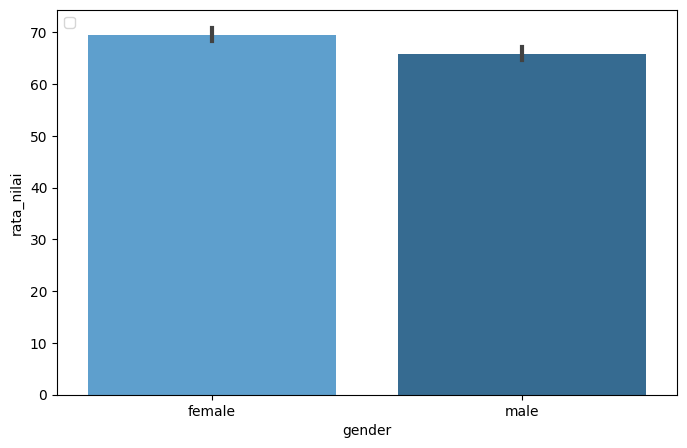

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x= 'gender', y = 'rata_nilai', data = student, errwidth=3,saturation=1, palette='Blues_d')
plt.legend(loc='upper left')

<ipython-input-10-937bebb50aa3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(student.corr(), vmin=-1, cmap="plasma_r", annot=True)


<Axes: >

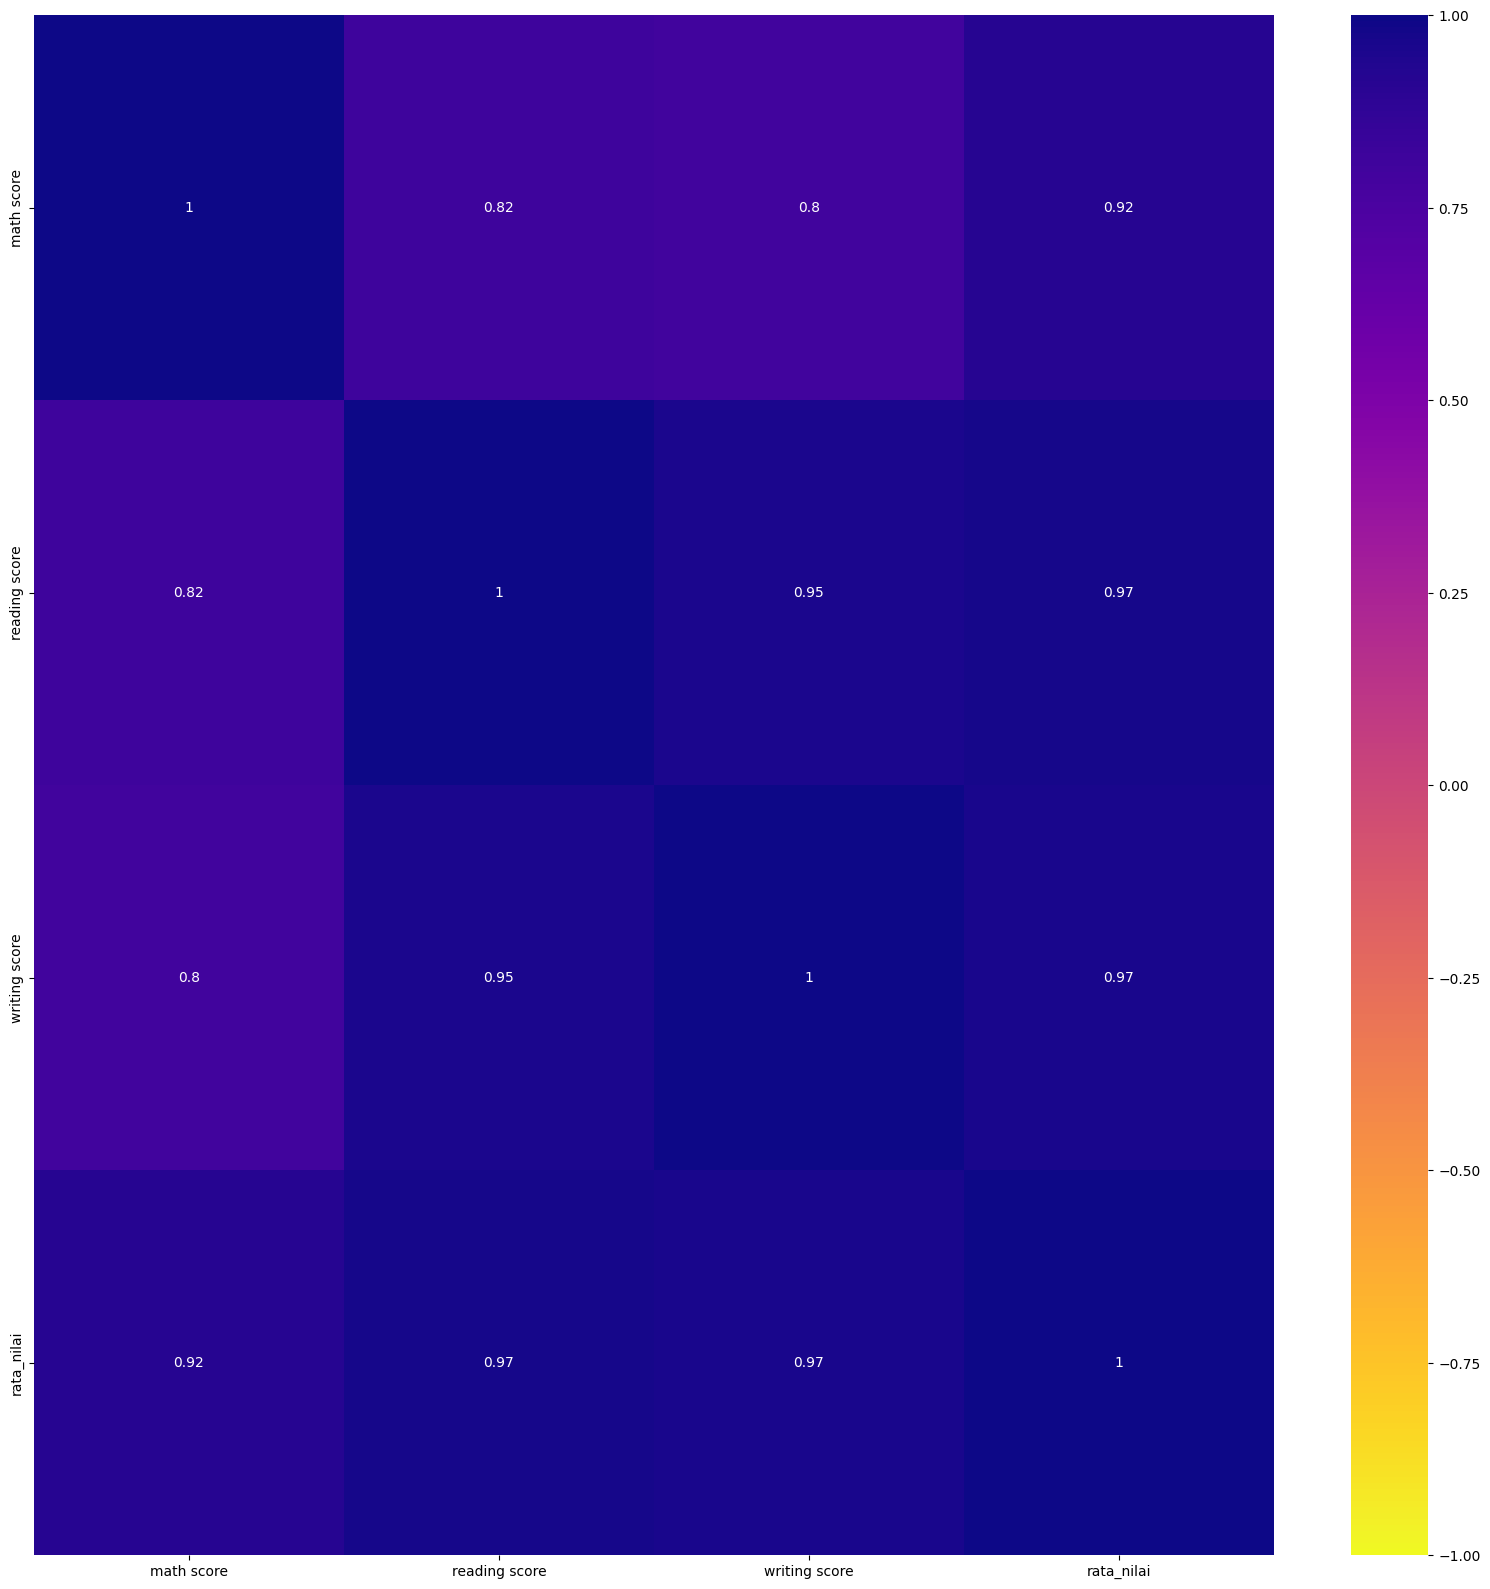

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(student.corr(), vmin=-1, cmap="plasma_r", annot=True)

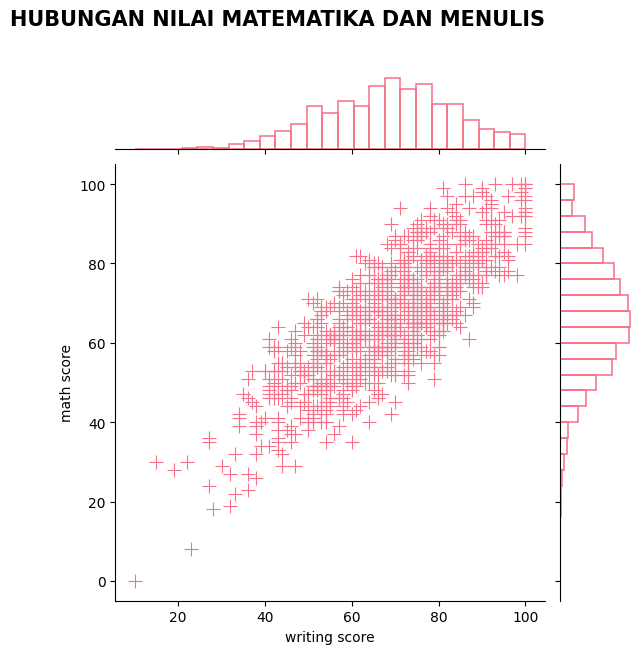

In [36]:
sns.set_palette("husl", 9)
sns.jointplot(
    data=student, x="writing score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)
plt.title('HUBUNGAN NILAI MATEMATIKA DAN MENULIS', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

 ada korelasi positif antara nilai menulis dan matematika; saat satu meningkat, yang lain juga meningkat

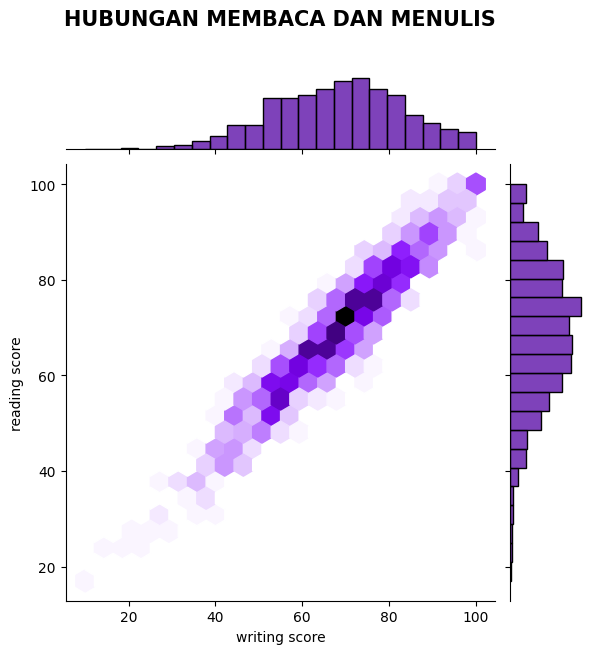

In [38]:
sns.set_palette("plasma")
sns.jointplot(data=student, x="writing score", y="reading score", kind="hex")
plt.title('HUBUNGAN MEMBACA DAN MENULIS', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

In [11]:
value.head()

,gender,rata_nilai
0,female,72.666667
1,female,82.333333
2,female,92.666667
3,male,49.333333
4,male,76.333333


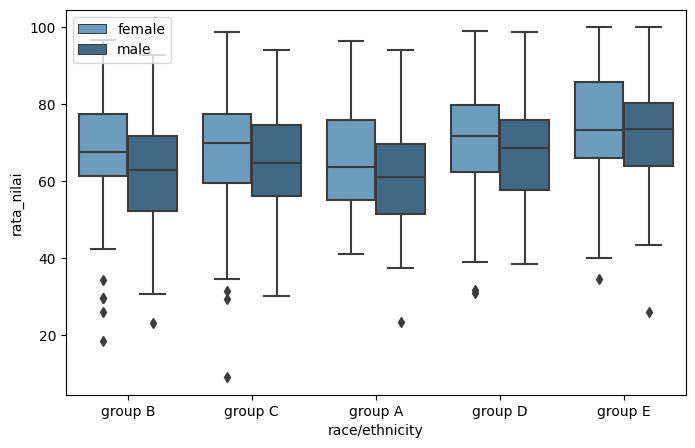

In [12]:
# membuat figur dengan ukuran tertentu
plt.figure(figsize=(8,5))

# membuat grafik box plot dengan seaborn
sns.boxplot(x= 'race/ethnicity', y = 'rata_nilai', data = student, hue='gender', palette='Blues_d', width=0.8)

# menambahkan legenda grafik
plt.legend(loc='upper left')

# menampilkan grafik
plt.show()

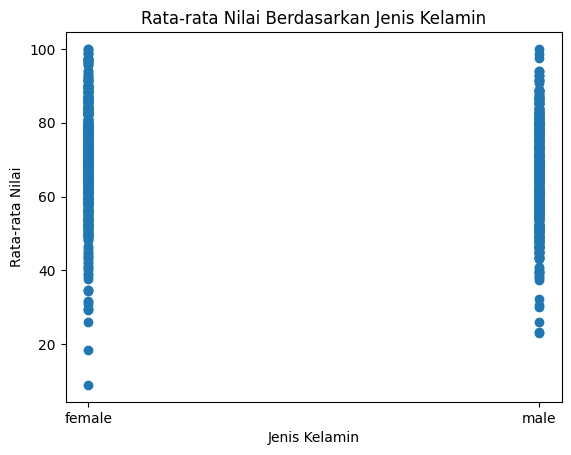

In [13]:
plt.scatter(value['gender'], value['rata_nilai'])
plt.title('Rata-rata Nilai Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Nilai')
# Tampilkan diagram
plt.show()

In [14]:
# Pilih kolom rata_nilai yang ingin diuji normalitas
selected_data = value['rata_nilai']

# Uji normalitas dengan uji Shapiro-Wilk
statistic, p_value = stats.shapiro(selected_data)

# Output hasil uji
print(f'Statistic: {statistic}, P-value: {p_value}')

# Interpretasi hasil uji
alpha = 0.05
if p_value > alpha:
    print("Data terdistribusi normal (tidak dapat menolak H0)")
else:
    print("Data tidak terdistribusi normal (menolak H0)")

Statistic: 0.9931509494781494, P-value: 0.0001453693985240534
Data tidak terdistribusi normal (menolak H0)


In [ ]:
value['rata_nilai_log'] = np.log1p(value['rata_nilai'])

In [16]:
print(len(value))

1000


asumsi saya adalah jika panjang data 1000 maka anova dapat mengatasi ketidaknormalan yg terjadi maka dari itu saya melanjutkan analisis Anova

In [17]:
from statsmodels.formula.api import ols

model = ols('rata_nilai ~ gender', data=value).fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:             rata_nilai   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     17.39
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           3.31e-05
Time:                        12:16:13   Log-Likelihood:                -4067.1
No. Observations:                1000   AIC:                             8138.
Df Residuals:                     998   BIC:                             8148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         69.5695      0.621    111.

Berdasarkan hasil analisis ANOVA, dapat disimpulkan bahwa terdapat perbedaan yang signifikan antara rata-rata nilai siswa laki-laki dan perempuan. Siswa perempuan memiliki rata-rata nilai yang lebih tinggi daripada siswa laki-laki

In [18]:
selesai = student['test preparation course'].value_counts()["completed"]
print("kursus selesai:",selesai)
tidak_kursus = student['test preparation course'].value_counts()["none"]
print("tidak menggunakan kursus:",tidak_kursus)

kursus selesai: 358
tidak menggunakan kursus: 642


rata-rata siswa tidak menggunakan kursus

In [19]:
# Tambahkan kolom rata_nilai
student['rata_nilai'] = rata_nilai

# Buat dataframe baru
test = student[['test preparation course', 'rata_nilai']]

In [20]:
test.head()

,test preparation course,rata_nilai
0,none,72.666667
1,completed,82.333333
2,none,92.666667
3,none,49.333333
4,none,76.333333


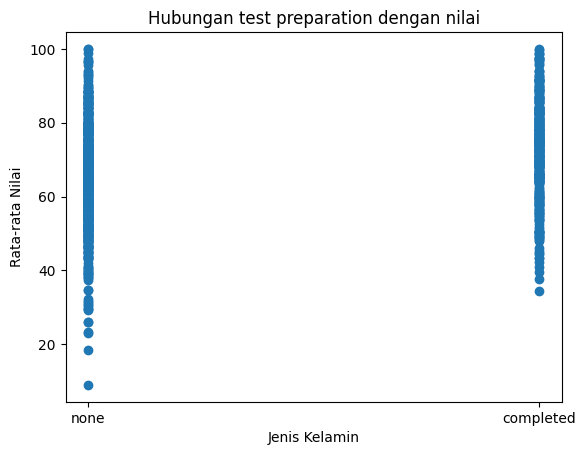

In [21]:
plt.scatter(test['test preparation course'], value['rata_nilai'])
plt.title('Hubungan test preparation dengan nilai')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Nilai')
plt.show()

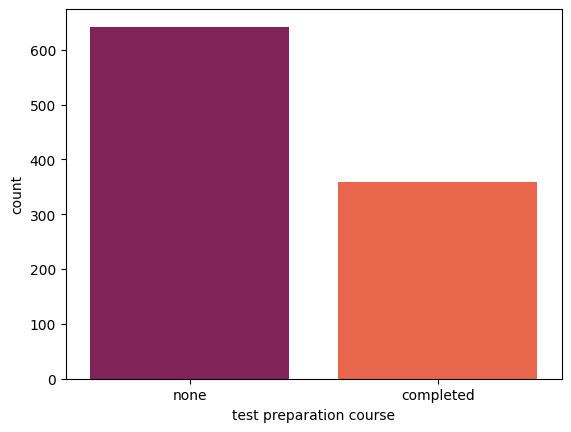

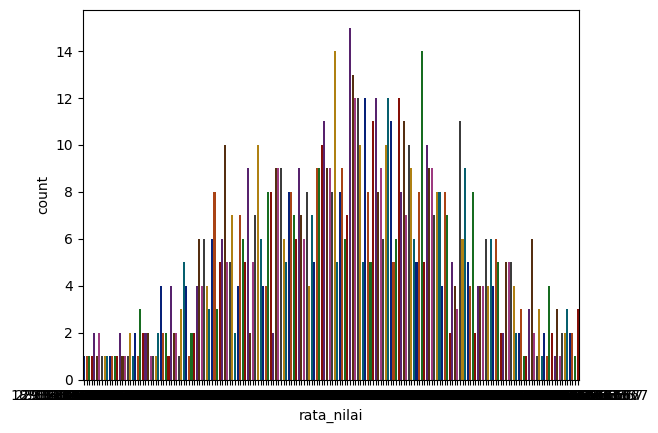

In [22]:
sns.countplot(x='test preparation course', data = student, palette='rocket', saturation=0.9)
plt.show()
sns.countplot(x='rata_nilai', data = student, palette='dark', saturation=0.9)
plt.show()

In [23]:
# Preprocessing data
test["test preparation course"] = test["test preparation course"].replace("completed", 1)
test["test preparation course"] = test["test preparation course"].replace("none", 0)

# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(test, test["rata_nilai"], test_size=0.25)

# Membangun model
model = LinearRegression()
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Membuat model regresi linier dengan statsmodels
model = sm.OLS(y_train, X_train).fit()

# Melihat ringkasan hasil regresi
print(model.summary())
y_pred = model.predict(X_test)
# Evaluasi model
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:             rata_nilai   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.260e+31
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:16:16   Log-Likelihood:                 22110.
No. Observations:                 750   AIC:                        -4.421e+04
Df Residuals:                     747   BIC:                        -4.420e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

<ipython-input-23-640e4ed4c3cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["test preparation course"] = test["test preparation course"].replace("completed", 1)
<ipython-input-23-640e4ed4c3cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["test preparation course"] = test["test preparation course"].replace("none", 0)


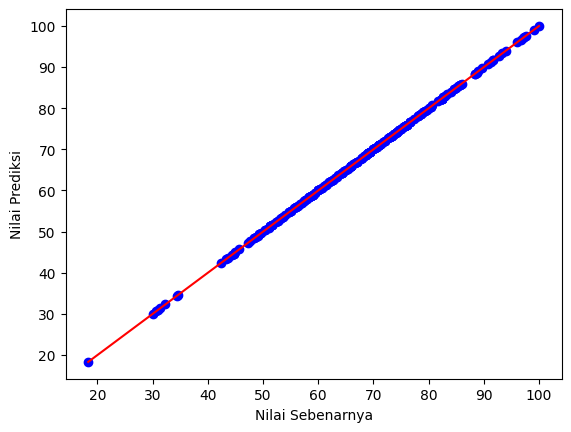

In [24]:
plt.scatter(y_test, y_pred, color="blue")
# Menambahkan garis identitas
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
# Memberi label sumbu
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Nilai Prediksi")
# Menampilkan grafik
plt.show()

dapat di lihat garis merah linear dengan titik biru menandakan bahwa hasil regresi semakain mendekati

In [25]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,rata_nilai
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [26]:
# Tambahkan kolom rata_nilai
student['rata_nilai'] = rata_nilai

different = student[['race/ethnicity', 'rata_nilai']]
print(different)

    race/ethnicity  rata_nilai
0          group B   72.666667
1          group C   82.333333
2          group B   92.666667
3          group A   49.333333
4          group C   76.333333
..             ...         ...
995        group E   94.000000
996        group C   57.333333
997        group C   65.000000
998        group D   74.333333
999        group D   83.000000

[1000 rows x 2 columns]


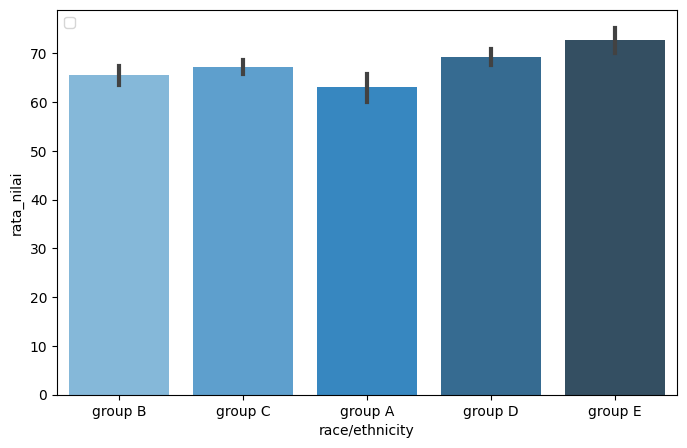

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x= 'race/ethnicity', y = 'rata_nilai', data = student, errwidth=3,saturation=1, palette='Blues_d')
plt.legend(loc='upper left')

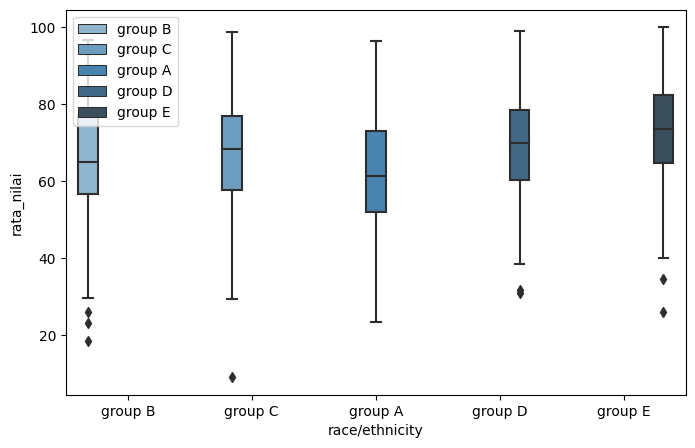

In [28]:
# membuat figur dengan ukuran tertentu
plt.figure(figsize=(8,5))

# membuat grafik box plot dengan seaborn
sns.boxplot(x= 'race/ethnicity', y = 'rata_nilai', data = student, hue='race/ethnicity', palette='Blues_d', width=0.8)

# menambahkan legenda grafik
plt.legend(loc='upper left')

# menampilkan grafik
plt.show()

In [29]:
different["race/ethnicity"] = different["race/ethnicity"].replace("group A", 0)
different["race/ethnicity"] = different["race/ethnicity"].replace("group B", 1)
different["race/ethnicity"] = different["race/ethnicity"].replace("group C", 2)
different["race/ethnicity"] = different["race/ethnicity"].replace("group D", 3)
different["race/ethnicity"] = different["race/ethnicity"].replace("group E", 4)



<ipython-input-29-0f8eb3eebd98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different["race/ethnicity"] = different["race/ethnicity"].replace("group A", 0)
<ipython-input-29-0f8eb3eebd98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different["race/ethnicity"] = different["race/ethnicity"].replace("group B", 1)
<ipython-input-29-0f8eb3eebd98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [30]:
different.head()

,race/ethnicity,rata_nilai
0,1,72.666667
1,2,82.333333
2,1,92.666667
3,0,49.333333
4,2,76.333333


In [31]:
X = different

In [32]:
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

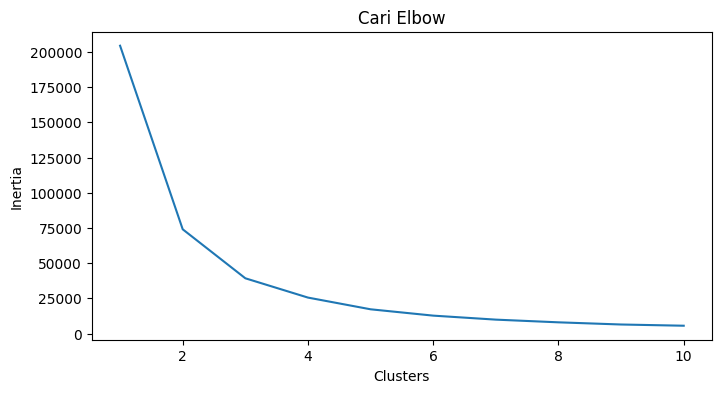

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-34-43300259820d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = km5.labels_


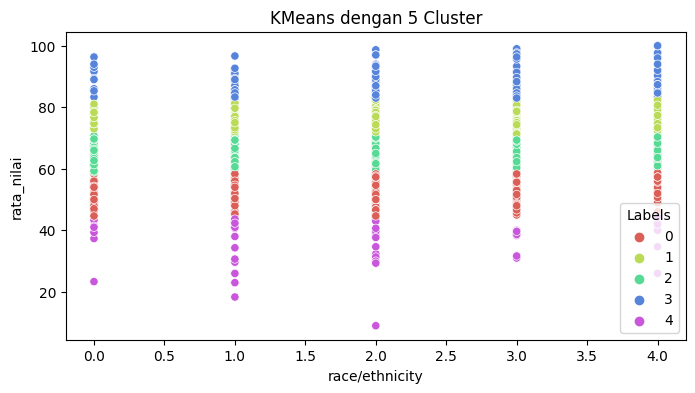

In [34]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['race/ethnicity'], y=X['rata_nilai'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

tertentu.
Klaster 0 (ungu) memiliki nilai rata-rata tertinggi, diikuti oleh klaster 4 (kuning), klaster 3 (merah), klaster 2 (hijau), dan klaster 1 (biru). Ini menunjukkan bahwa ada perbedaan prestasi akademik antara kelompok ras/etnis yang berbeda. Namun, ini tidak berarti bahwa ras/etnis adalah faktor penentu utama dalam prestasi akademik, karena mungkin ada faktor lain yang berpengaruh, seperti latar belakang sosial, ekonomi, budaya, atau pendidikan.

Klaster 0 (ungu) dan klaster 4 (kuning) tampak lebih terpisah dari klaster lain, sedangkan klaster 1 (biru), klaster 2 (hijau), dan klaster 3 (merah) tampak lebih tumpang tindih. Ini menunjukkan bahwa ada variasi yang lebih besar dalam nilai rata-rata antara kelompok ras/etnis yang berbeda daripada dalam kelompok ras/etnis yang sama. Namun, ini juga dapat disebabkan oleh ukuran sampel yang tidak seimbang, di mana beberapa kelompok ras/etnis mungkin memiliki lebih banyak atau lebih sedikit data daripada yang lain.